In [4]:
# Dependancies set up
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [5]:
# Loading the CSV file into the dataframe
crypto_df = pd.read_csv('Instructions/crypto_data.csv')
crypto_df.head(15)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [6]:
# Filtering for currencies that are still being traded
current_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
current_crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [12]:
# Drop 'IsTrading' Column
crypto_df = crypto_df.drop(columns ='IsTrading')

KeyError: "['IsTrading'] not found in axis"

In [9]:
# Check for null values
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [10]:
# Removing all rows with null values
crypto_df = crypto_df.dropna()

In [11]:
# Verifying that the null valued rows are dropped
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [16]:
# Filtering for the crpytocurrencies that have been mined already
mined_crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
mined_crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [17]:
# Saving the 'CoinName' column for t-SNE
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

KeyError: 'CoinName'

In [18]:
# Dropping the 'CoinName' column from the dataframe considering it has no value in the contribution to the data that we seek
mined_crypto_df.drop(columns='CoinName', axis=1, inplace= True)
mined_crypto_df

KeyError: "['CoinName'] not found in axis"

In [19]:
# Dropping 'Unnamed' column
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [20]:
# Converting the algorithm and prooftype into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Standarize the dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [22]:
# Number of features in cleaned dataset
len(X.columns)

113

In [23]:
# Reducing dimensions from 113 to 4 using PCA
pca = PCA(n_components=4)

# Grabbing three principal components for the crypto data.
crypto_pca1 = pca.fit_transform(crypto_scaled)

In [24]:
# Creating a dataframe from the PCA data
crypto_pca1_df = pd.DataFrame(data=crypto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
crypto_pca1_df.head()

,PC 1,PC 2,PC 3,PC4
0,-0.226067,1.265476,-0.355333,0.002564
1,-0.210653,1.264513,-0.355706,0.002630
2,-0.164410,0.790963,-0.187927,0.005151
3,0.345999,1.973607,-0.377608,-0.009824
4,-0.197558,-1.497198,0.110393,0.003903


In [25]:
# Viewing the explained variance ratio
pca.explained_variance_ratio_

array([0.01968821, 0.01853682, 0.0177504 , 0.01772103])

In [26]:
# Using PCA we preserve 90% of the 'explained variance' through dimension reduction
pca_2 = PCA(n_components=.90)

# Grabbing three principal components for the crypto data.
crypto_pca = pca_2.fit_transform(crypto_scaled)
crypto_pca

array([[-2.21380021e-01,  1.29786142e+00, -4.57924159e-01, ...,
        -1.98863372e-13, -1.97439802e-13, -1.14858610e-12],
       [-2.06313067e-01,  1.29666010e+00, -4.58523177e-01, ...,
        -1.99534225e-13, -1.97264262e-13, -1.14877757e-12],
       [-1.55752643e-01,  8.27385859e-01, -2.81079456e-01, ...,
         3.86123323e-15, -1.04765596e-14,  3.64111920e-15],
       ...,
       [-2.54104120e-01, -2.04610437e+00,  2.31880763e-01, ...,
        -2.01055603e-13, -1.98413438e-13, -1.15476455e-12],
       [-9.35278442e-02,  7.77886967e-01, -1.96852306e-01, ...,
        -2.02000130e-13, -1.92758351e-13, -1.15228388e-12],
       [-2.21073149e-01,  1.29783695e+00, -4.57936360e-01, ...,
        -1.99674642e-13, -1.97396836e-13, -1.14871586e-12]])

In [27]:
# Creating a dataframe from the PCA data
pca_data_df = pd.DataFrame(data=crypto_pca)
pca_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,-0.221380,1.297861,-0.457924,-3.000308e-07,-4.696449e-12,-1.026088e-10,-9.469125e-11,-2.624791e-10,0.010056,-1.052602,...,3.969199e-13,-1.642885e-13,-2.150222e-14,2.007854e-13,-1.089232e-12,4.445127e-14,7.779639e-13,-1.988634e-13,-1.974398e-13,-1.148586e-12
1,-0.206313,1.296660,-0.458523,-3.000308e-07,-4.696780e-12,-1.026088e-10,-9.469112e-11,-2.624788e-10,0.008591,-1.055935,...,3.970771e-13,-1.638803e-13,-2.160269e-14,2.013983e-13,-1.088697e-12,4.401789e-14,7.780471e-13,-1.995342e-13,-1.972643e-13,-1.148778e-12
2,-0.155753,0.827386,-0.281079,-2.148769e-07,-3.362625e-12,-7.348888e-11,-6.781651e-11,-1.879848e-10,-0.003988,-0.662536,...,-1.480926e-14,9.591018e-15,-1.703846e-14,-5.591316e-15,-6.881815e-15,-1.525208e-14,-1.956447e-14,3.861233e-15,-1.047656e-14,3.641119e-15
3,0.295682,1.990917,-0.487168,-4.308326e-07,-6.735908e-12,-1.473513e-10,-1.359724e-10,-3.769115e-10,-0.037589,-0.805303,...,-6.087631e-14,3.464272e-14,-2.169509e-14,-3.404832e-14,-9.042108e-14,-3.478408e-14,4.053845e-15,-3.808218e-14,-1.264374e-14,-6.399709e-14
4,-0.189728,-1.486730,0.110284,1.780704e-07,2.784252e-12,6.090726e-11,5.620112e-11,1.557945e-10,-0.001555,-0.032531,...,-1.908184e-14,1.333226e-14,-1.289658e-14,-7.886441e-15,-8.339324e-15,-1.387194e-14,-1.500852e-14,-9.751885e-17,-1.038284e-14,4.863485e-16


In [28]:
# Fetching the explained variance
pca.explained_variance_ratio_

array([0.01968821, 0.01853682, 0.0177504 , 0.01772103])

([<matplotlib.axis.XTick at 0x7f96c0203280>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

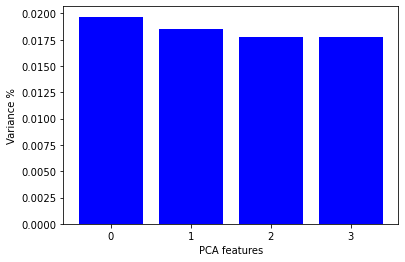

In [29]:
# Creating a bar chart with explained variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

In [32]:
# The number of features shows 90% of original dataset with 88
len(pca_data_df.columns)

88

In [33]:
# Priming the t-SNE model
t_sne = TSNE(learning_rate=35)

In [36]:
# Reducing the dimensions down to two using the t-SNE model
t_sne_features = t_sne.fit_transform(pca_data_df)
t_sne_features.shape

(744, 2)

In [37]:
# The first column of transformed features
x = t_sne_features[:,0]

# The second column of transformed features
y = t_sne_features[:,1]

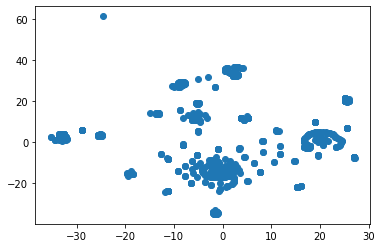

In [38]:
# Plotting the results
plt.scatter(x, y)
plt.show()

In [ ]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculating the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()